In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import numpy as np
import sklearn.decomposition
import librosa
import librosa.display
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [10]:
from collections import defaultdict
import os

y_data  = defaultdict(lambda : defaultdict(list))
sr_data = defaultdict(lambda : defaultdict(list))

for i, name in enumerate(os.listdir('../datasets/hw3/VoiceData/')):
    for j, target in enumerate(os.listdir(f'../datasets/hw3/VoiceData/{name}')):
        print(name, target)
        path = f"../datasets/hw3/VoiceData/{name}/{target}"
        for file in os.listdir(path):
            tmp_y, tmp_sr = librosa.load(os.path.join(path, file))
            y_data[name][target].append(tmp_y)
            sr_data[name][target].append(tmp_sr)

David Hey-hey, open window
David It`s me, open
David Open the door
David Ку-ку, это я
David Привет, я дома
David Эй, открой дверь
David Это я, открой
Roman Hey-hey, open window
Roman It`s me, open
Roman Open the door
Roman Ку-ку, это я
Roman Привет, я дома
Roman Эй, открой дверь
Roman Это я, открой
Valentine Hey-hey, open window
Valentine It`s me, open
Valentine Open the door
Valentine Ку-ку, это я
Valentine Привет, я дома
Valentine Эй, открой дверь
Valentine Это я, открой


In [12]:


y_data_dict = {name: dict(val) for name, val in y_data.items()}
sr_data_dict = {name: dict(val) for name, val in sr_data.items()}

with open("../datasets/hw3/VoiceData/all_data.dav", 'wb') as file:
    pickle.dump((y_data_dict, sr_data_dict), file)


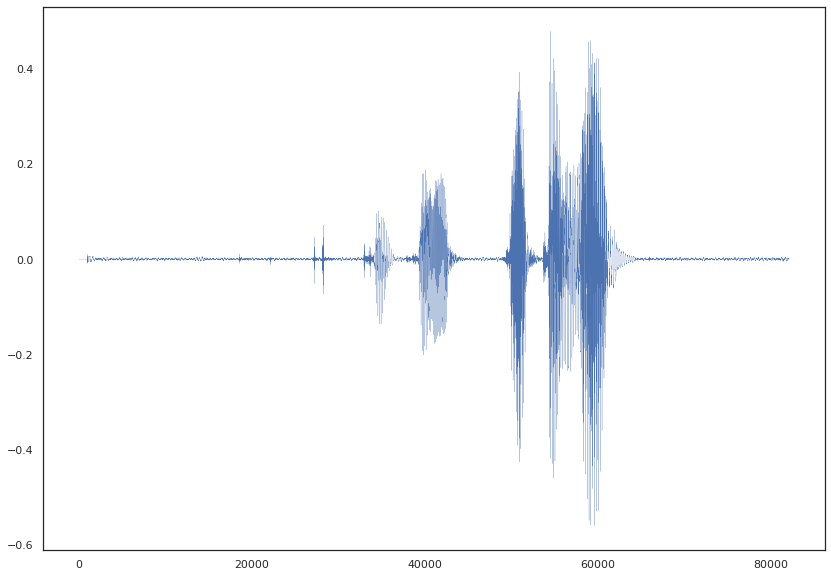

In [13]:
plt.plot(y_data_dict['David']['Ку-ку, это я'][0], linewidth=.2)

In [2]:
with open("../datasets/hw3/VoiceData/all_data.dav", 'rb') as file:
    y_data, sr_data = pickle.load(file)

In [19]:
dataset_x = []
dataset_y = []
for i, name in enumerate(y_data):
    for x in y_data[name].values():
        dataset_x += x
        dataset_y += [i] * len(x)

In [21]:
len(dataset_y)

210

In [22]:
max_len = max(map(len, dataset_x))
for i, el in enumerate(dataset_x):
    next_el = np.zeros(max_len)
    next_el[:len(el)] = el
    dataset_x[i] = next_el
dataset_x = np.array(dataset_x)
dataset_x.shape

(210, 109584)

In [34]:
from sklearn.decomposition import PCA
import pandas as pd

def pca_transform(x, y, num_components=2):
    target = pd.DataFrame(y, columns=['target'])
    pca = PCA(n_components=num_components)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = [f'PC{i}' for i in range(1, num_components+1)])
    finalDf = pd.concat([principalDf, target], axis = 1)
    return finalDf

res = pca_transform(dataset_x, dataset_y, 3)
res

,PC1,PC2,PC3,target
0,0.322810,0.665140,0.165309,0
1,-0.788846,-0.189694,0.196252,0
2,-0.657976,0.019267,-0.116550,0
3,-0.078317,0.296889,0.111996,0
4,-0.486600,-1.529086,-0.116347,0
...,...,...,...,...
205,-0.279718,-0.009673,-0.257609,2
206,-0.683489,0.205781,-0.558335,2
207,-0.195040,-0.907837,-0.118363,2
208,-0.053267,0.340005,0.007183,2


In [35]:
from sklearn.manifold import TSNE

embedding = TSNE(n_components=3, verbose=1).fit_transform(res)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 210 samples in 0.001s...
[t-SNE] Computed neighbors for 210 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 210 / 210
[t-SNE] Mean sigma: 0.340017
[t-SNE] KL divergence after 250 iterations with early exaggeration: 98.790123
[t-SNE] KL divergence after 1000 iterations: 1.797388


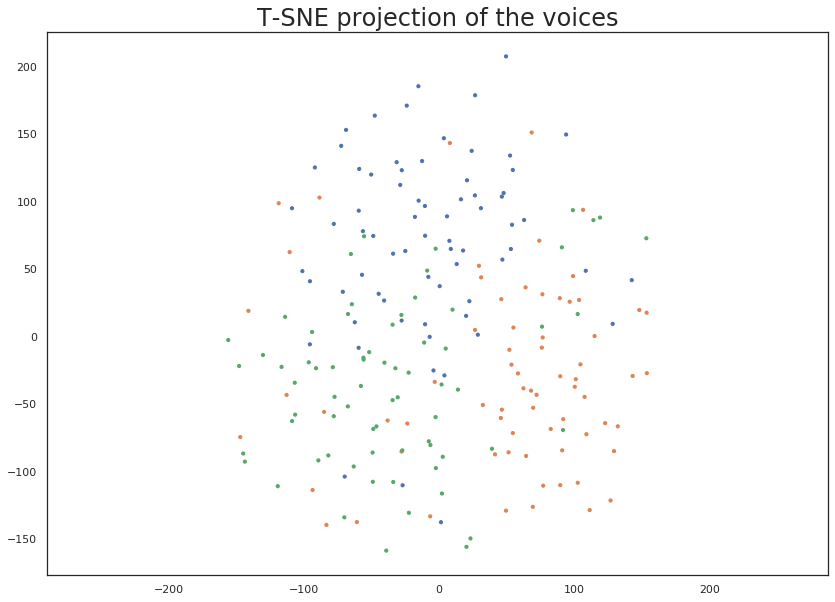

In [37]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[y] for y in res['target']], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('T-SNE projection of the voices', fontsize=24);

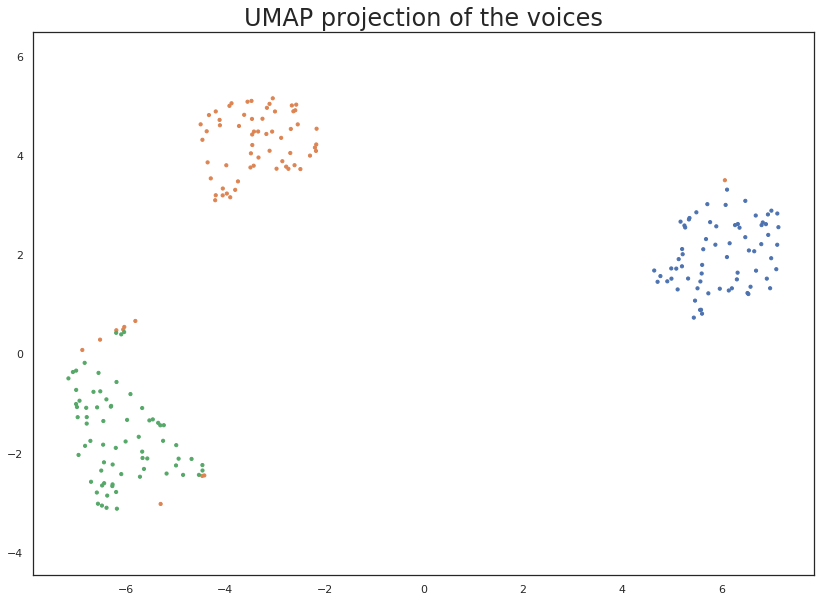

In [39]:
import umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(res)

plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[y] for y in res['target']], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the voices', fontsize=24);

In [44]:
reducer = umap.UMAP(n_components=3)
embedding = reducer.fit_transform(dataset_x)

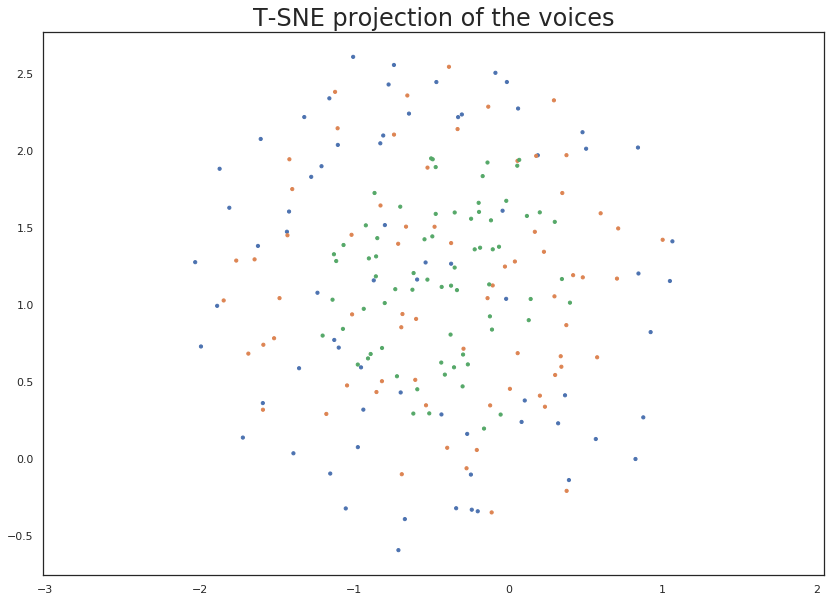

In [45]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[y] for y in dataset_y], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('T-SNE projection of the voices', fontsize=24);